In [11]:
# library
import matplotlib
from matplotlib_venn import venn2
import pandas as pd
import numpy as np
%run './functions.ipynb'

In [12]:
#  full proteome_z_scores
Z_SCORES_df_proteome = pd.read_csv(Path(direcroy_path)/Path(Z_SCORES_PATH),sep='\t')
Z_SCORES_df_proteome = Z_SCORES_df_proteome.set_index('Gene names')
Z_SCORES_df_proteome = Z_SCORES_df_proteome.filter(regex=REGEX)
# there is no protein grouping at transcriptome level we unnest the protein groups also for protein data
Z_SCORES_df_proteome = unnest_proteingroups(Z_SCORES_df_proteome)
Z_SCORES_df_proteome.columns = Z_SCORES_df_proteome.columns.str.replace('zscore_','')

# transcriptome_z_scores
transcripts_z_scores = pd.read_csv(transcripts_path)
transcripts_z_scores = transcripts_z_scores.set_index('genes')
transcripts_z_scores =  transcripts_z_scores.filter(regex=Z_SCORE_REGEX)
transcripts_z_scores.columns = transcripts_z_scores.columns.str.replace(' Z-score','')

transcripts_z_scores = protein_remover_by_sparcity(transcripts_z_scores)
Z_SCORES_df_proteome = protein_remover_by_sparcity(Z_SCORES_df_proteome)

len_protein_transcriptome_overlapping = len(intersection(transcripts_z_scores.index.tolist(),Z_SCORES_df_proteome.index.tolist()))
len_transcript_not_proteomics = len(setdiff(transcripts_z_scores.index.tolist(),Z_SCORES_df_proteome.index.tolist()))
len_proteomics_not_transcript = len(setdiff(Z_SCORES_df_proteome.index.tolist(),transcripts_z_scores.index.tolist()))

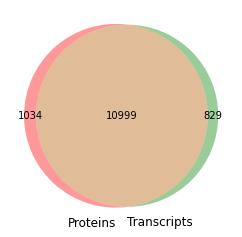

In [15]:
venn2(subsets = (len_proteomics_not_transcript,
                len_transcript_not_proteomics,
                len_protein_transcriptome_overlapping), 
                set_labels = ('Proteins', 'Transcripts'))

matplotlib.pyplot.savefig('/home/amir/Desktop/venn_protein_transctipts.svg',dpi=300)

